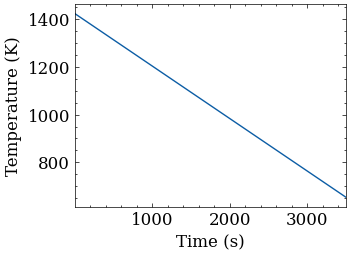

In [16]:
from kawin.Thermodynamics import MulticomponentThermodynamics
from kawin.KWNEuler import PrecipitateModel
from kawin.Surrogate import MulticomponentSurrogate, generateTrainingPoints
import numpy as np
import matplotlib.pyplot as plt

elements = ['NI', 'AL', 'CR']
phases = ['FCC_A1', 'GAMMA_PRIME']
therm = MulticomponentThermodynamics('NiCrAl2.tdb', elements, phases)
therm.setMobilityCorrection('all', 5)

t0, tf, steps = 0, 3500, 1e4
model = PrecipitateModel(t0, tf, steps, elements=['AL', 'CR'], linearTimeSpacing=True)
model.setConstraints(checkCompositionPre=True)

model.setInitialComposition([0.09, 0.09])
model.setInterfacialEnergy(0.023)

model.setTemperatureArray([0, 3500/3600], [1150+273, 380+273])

a = 0.352e-9
Va = a**3
Vb = Va
atomsPerCell = 4
model.setVaAlpha(Va, atomsPerCell)
model.setVaBeta(Vb, atomsPerCell)

#model.setNucleationSite('dislocations')
#model.setNucleationDensity(dislocationDensity=5e12)
model.setNucleationSite('bulk')
model.setNucleationDensity(bulkN0 = 1e30)
model.setThermodynamics(therm)

fig, ax = plt.subplots()
model.plot(ax, 'Temperature')
ax.set_xscale('linear')

In [17]:
model.setPSDrecording(True)

model.solve(verbose=True, vIt=100)
model.save('NiCrAl_TC2_1010')

model.saveRecordedPSD('NiCrAl_TC2_PSD_1010')

N	Time (s)	Temperature (K)	AL	CR	
100	3.5e+01		1415		9.0000	9.0000	

	Phase	Prec Density (#/m3)	Volume Frac	Avg Radius (m)	Driving Force (J/mol)
	beta	0.000e+00		0.0000		0.0000e+00	-1.3535e+03

N	Time (s)	Temperature (K)	AL	CR	
200	7.0e+01		1408		9.0000	9.0000	

	Phase	Prec Density (#/m3)	Volume Frac	Avg Radius (m)	Driving Force (J/mol)
	beta	0.000e+00		0.0000		0.0000e+00	-1.3218e+03

N	Time (s)	Temperature (K)	AL	CR	
300	1.1e+02		1400		9.0000	9.0000	

	Phase	Prec Density (#/m3)	Volume Frac	Avg Radius (m)	Driving Force (J/mol)
	beta	0.000e+00		0.0000		0.0000e+00	-1.2900e+03

N	Time (s)	Temperature (K)	AL	CR	
400	1.4e+02		1392		9.0000	9.0000	

	Phase	Prec Density (#/m3)	Volume Frac	Avg Radius (m)	Driving Force (J/mol)
	beta	0.000e+00		0.0000		0.0000e+00	-1.2582e+03

N	Time (s)	Temperature (K)	AL	CR	
500	1.8e+02		1384		9.0000	9.0000	

	Phase	Prec Density (#/m3)	Volume Frac	Avg Radius (m)	Driving Force (J/mol)
	beta	0.000e+00		0.0000		0.0000e+00	-1.2263e+03

N	Time (s)	Temperature (K)	AL	

Input time is larger than longest recorded time, setting PSD to t = 3.500e+03


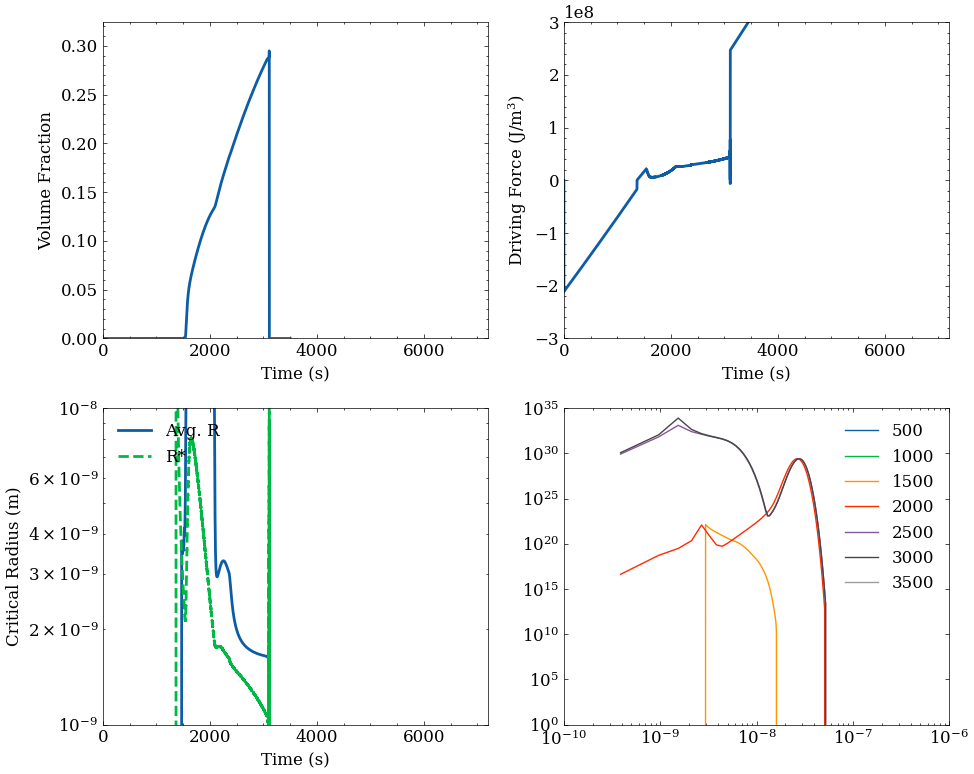

In [19]:
from kawin.PopulationBalance import PopulationBalanceModel

plt.style.use(['science', 'no-latex'])
plt.rcParams.update({'font.size': 12})

fig, axes = plt.subplots(2, 2, figsize=(10,8))

model = PrecipitateModel.load('NiCrAl_TC2_1010.npz')

model.plot(axes[0,0], 'Volume Fraction', linewidth=2)
#axes[0,0].set_ylim([1e10, 1e27])
#axes[0,0].set_yscale('log')

model.plot(axes[0,1], 'Driving Force', linewidth=2)
axes[0,1].set_ylim([-0.3e9, 0.3e9])

model.plot(axes[1,0], 'Average Radius', color='C0', linewidth=2, label='Avg. R')
model.plot(axes[1,0], 'Critical Radius', color='C1', linewidth=2, linestyle='--', label='R*')
axes[1,0].legend(loc='upper left')
axes[1,0].set_ylim([1e-9, 1e-8])
axes[1,0].set_yscale('log')

#model.plot(axes[1,1], 'Size Distribution Density', linewidth=2)
#axes[1,1].set_ylim([1e0, 1e35])
#axes[1,1].set_yscale('log')
#axes[1,1].set_xlim([1e-10, 1e-6])
#axes[1,1].set_xscale('log')

axes[0,0].set_xscale('linear')
axes[0,1].set_xscale('linear')
axes[1,0].set_xscale('linear')

axes[0,0].set_xlim([0, 7200])
axes[0,1].set_xlim([0, 7200])
axes[1,0].set_xlim([0, 7200])

pbm = PopulationBalanceModel()
pbm.loadRecordedPSD('NiCrAl_TC2_PSD_1010_beta.npz')

times = [500, 1000, 1500, 2000, 2500, 3000, 3500]
for t in times:
    pbm.setPSDtoRecordedTime(t)
    pbm.PlotDistributionDensity(axes[1,1], label=t)

axes[1,1].set(ylim=[1e0, 1e35], yscale='log', xlim=[1e-10, 1e-6], xscale='log')
axes[1,1].legend()

fig.tight_layout()
plt.show()